In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras import datasets


In [14]:
# MNIST 데이터셋에서 훈련 데이터와 레이블, 테스트 데이터와 레이블을 로드합니다.
(X_train, Y_train),(X_test, Y_test)= datasets.mnist.load_data()

# 훈련 데이터의 형태와 레이블의 형태를 출력합니다.
print(X_train.shape,Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


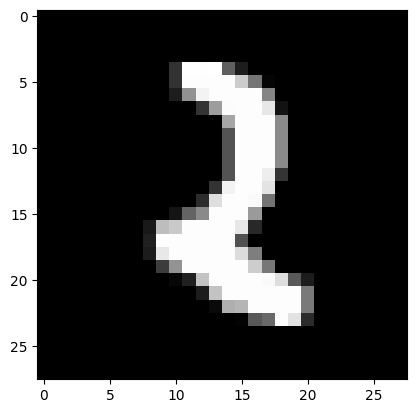

2
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 254 254 255  95  29   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 253 253 253 253 204 117   5
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  29 146 243 253 253 253 253 133
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  51 157 252 253 253 231
   18   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 166 

In [15]:
# 무작위로 선택한 샘플 이미지를 플로팅합니다.
my_sample =np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap='gray')
plt.show()
# 선택한 샘플의 레이블과 픽셀 값들을 출력합니다
print(Y_train[my_sample])
print(X_train[my_sample])
# 0~255 : 255가 가장 큰 값

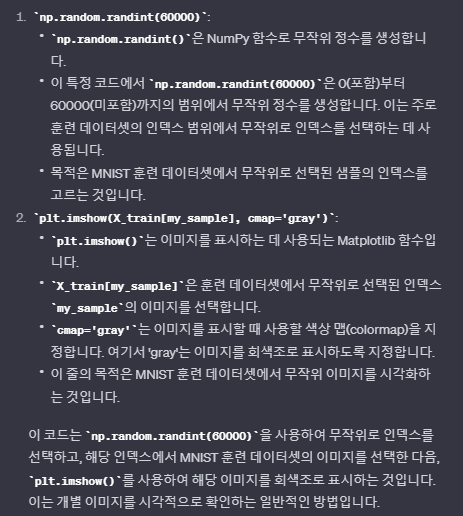

In [16]:
# to_categorical 함수를 사용하여 레이블을 원-핫 인코딩합니다.
y_train = to_categorical(Y_train)
y_test= to_categorical(Y_test)
# 인코딩된 레이블을 출력합니다.
print(Y_train[5000]) # 5000번 인덱스에 나온 값을 출력
print(y_train[5000])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [17]:
# 이미지 데이터를 1차원으로 변환합니다.
x_train = X_train.reshape(-1,28*28)
x_test = X_test.reshape(-1,28*28)
# 픽셀 값의 범위를 0~255에서 0~1로 조정합니다.
x_train = x_train / 255
x_test = x_test / 255
# 변환된 데이터의 형태를 출력합니다.
print(x_train.shape)

(60000, 784)


In [18]:
model = Sequential()
model.add(Dense(128,input_dim= 784,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax')) # 다중 클래스 구분을 위한 마지막 function은 softmax를 써야한다.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


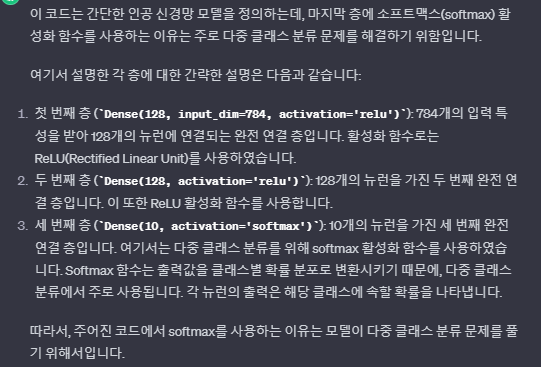

In [19]:
#opt=Adam(learning_rate=0.01)
#model.compile(opt, loss='categorial_crossentropy',metrics=['accuracy'])
#model.fit(x_train, y_train,batch_size=256,epochs=15,validation_split=0.2,verbose=1)

opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  # 'categorical_crossentropy'로 수정

fit_hist=model.fit(x_train, y_train, batch_size=256, epochs=15, validation_split=0.2, verbose=1)

Epoch 1/15
188/188 [==============================] - 3s 9ms/step - loss: 0.2837 - accuracy: 0.9115 - val_loss: 0.1580 - val_accuracy: 0.9501
Epoch 2/15
188/188 [==============================] - 1s 7ms/step - loss: 0.1220 - accuracy: 0.9618 - val_loss: 0.1346 - val_accuracy: 0.9578
Epoch 3/15
188/188 [==============================] - 1s 7ms/step - loss: 0.0945 - accuracy: 0.9703 - val_loss: 0.1212 - val_accuracy: 0.9637
Epoch 4/15
188/188 [==============================] - 1s 7ms/step - loss: 0.0704 - accuracy: 0.9780 - val_loss: 0.1220 - val_accuracy: 0.9667
Epoch 5/15
188/188 [==============================] - 1s 7ms/step - loss: 0.0668 - accuracy: 0.9784 - val_loss: 0.1151 - val_accuracy: 0.9670
Epoch 6/15
188/188 [==============================] - 1s 7ms/step - loss: 0.0539 - accuracy: 0.9827 - val_loss: 0.1256 - val_accuracy: 0.9682
Epoch 7/15
188/188 [==============================] - 1s 7ms/step - loss: 0.0565 - accuracy: 0.9826 - val_loss: 0.1344 - val_accuracy: 0.9677
Epoch 

In [20]:
score =model.evaluate(x_test,y_test,verbose=0)
print('accuracy',score[1])


accuracy 0.9634000062942505


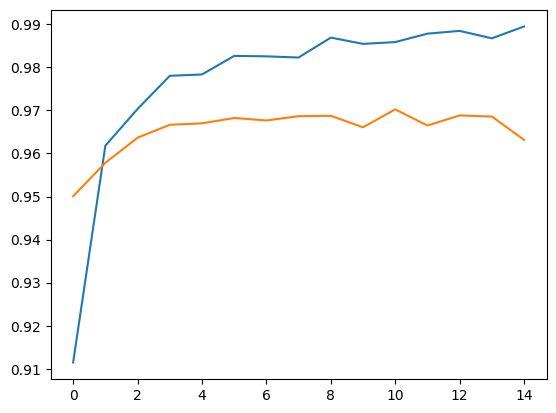

In [21]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

6
1/1 [==============================] - 0s 87ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
6


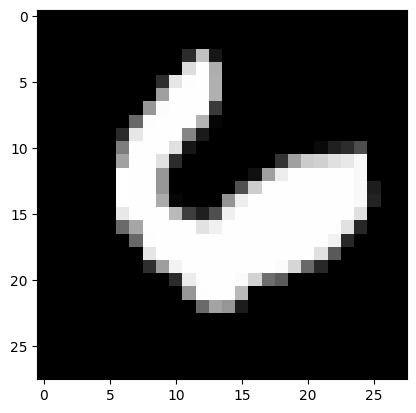

In [22]:
# 랜덤한 샘플 선택
my_sample = np.random.randint(10000)
# 선택한 샘플 이미지 표시
plt.imshow(X_test[my_sample], cmap='gray')
# 선택한 샘플의 실제 레이블 출력
print(Y_test[my_sample])
# 모델로 예측 수행
pred = model.predict(X_test[my_sample].reshape(-1, 784))  # Reshape을 통해 모델에 입력할 수 있도록 변경
print(pred)
print(np.argmax(pred))
